In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 

In [2]:
#load the data
df_f_2018 = pd.read_csv('flights_18.csv', index_col=[0],low_memory=False)
df_f_2019 = pd.read_csv('flights_19.csv', index_col=[0],low_memory=False)

In [3]:
df = pd.concat([df_f_2018, df_f_2019]).reset_index().drop(columns=['index'])

In [4]:
df.head(2)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-01-01,DL,DL_CODESHARE,DL,3468,9E,N292PQ,3468,15380,TVC,...,207.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,DL,DL_CODESHARE,DL,3470,9E,N309PQ,3470,13871,OMA,...,651.0,47.0,0.0,11.0,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
df.shape

(15927485, 42)

In [6]:
df.isnull().sum()

fl_date                       0
mkt_unique_carrier            0
branded_code_share            0
mkt_carrier                   0
mkt_carrier_fl_num            0
op_unique_carrier             0
tail_num                  49269
op_carrier_fl_num             0
origin_airport_id             0
origin                        0
origin_city_name              0
dest_airport_id               0
dest                          0
dest_city_name                0
crs_dep_time                  0
dep_time                 258814
dep_delay                263754
taxi_out                 273274
wheels_off               273264
wheels_on                281162
taxi_in                  281172
crs_arr_time                  0
arr_time                 275079
arr_delay                311744
cancelled                     0
cancellation_code      15658277
diverted                      0
dup                           0
crs_elapsed_time             20
actual_elapsed_time      309157
air_time                 315221
flights 

In [7]:
df.dtypes 

fl_date                 object
mkt_unique_carrier      object
branded_code_share      object
mkt_carrier             object
mkt_carrier_fl_num       int64
op_unique_carrier       object
tail_num                object
op_carrier_fl_num        int64
origin_airport_id        int64
origin                  object
origin_city_name        object
dest_airport_id          int64
dest                    object
dest_city_name          object
crs_dep_time             int64
dep_time               float64
dep_delay              float64
taxi_out               float64
wheels_off             float64
wheels_on              float64
taxi_in                float64
crs_arr_time             int64
arr_time               float64
arr_delay              float64
cancelled              float64
cancellation_code       object
diverted               float64
dup                     object
crs_elapsed_time       float64
actual_elapsed_time    float64
air_time               float64
flights                float64
distance

In [8]:
df = df.convert_dtypes()

In [9]:
df.dtypes

fl_date                string
mkt_unique_carrier     string
branded_code_share     string
mkt_carrier            string
mkt_carrier_fl_num      Int64
op_unique_carrier      string
tail_num               string
op_carrier_fl_num       Int64
origin_airport_id       Int64
origin                 string
origin_city_name       string
dest_airport_id         Int64
dest                   string
dest_city_name         string
crs_dep_time            Int64
dep_time                Int64
dep_delay               Int64
taxi_out                Int64
wheels_off              Int64
wheels_on               Int64
taxi_in                 Int64
crs_arr_time            Int64
arr_time                Int64
arr_delay               Int64
cancelled               Int64
cancellation_code      string
diverted                Int64
dup                    string
crs_elapsed_time        Int64
actual_elapsed_time     Int64
air_time                Int64
flights                 Int64
distance                Int64
carrier_de

In [10]:
features = ['cancellation_code','carrier_delay','weather_delay','nas_delay','security_delay',
            'late_aircraft_delay','first_dep_time','total_add_gtime','longest_add_gtime','no_name',
            'op_carrier_fl_num','branded_code_share','dup','tail_num','mkt_unique_carrier','op_unique_carrier','origin_city_name']
df = df.drop(columns=features)

In [11]:
df.isnull().sum()

fl_date                     0
mkt_carrier                 0
mkt_carrier_fl_num          0
origin_airport_id           0
origin                      0
dest_airport_id             0
dest                        0
dest_city_name              0
crs_dep_time                0
dep_time               258814
dep_delay              263754
taxi_out               273274
wheels_off             273264
wheels_on              281162
taxi_in                281172
crs_arr_time                0
arr_time               275079
arr_delay              311744
cancelled                   0
diverted                    0
crs_elapsed_time           20
actual_elapsed_time    309157
air_time               315221
flights                     0
distance                    0
dtype: int64

In [12]:
df = df.dropna()

In [13]:
df.reset_index(inplace=True)

In [14]:
df.isnull().sum()

index                  0
fl_date                0
mkt_carrier            0
mkt_carrier_fl_num     0
origin_airport_id      0
origin                 0
dest_airport_id        0
dest                   0
dest_city_name         0
crs_dep_time           0
dep_time               0
dep_delay              0
taxi_out               0
wheels_off             0
wheels_on              0
taxi_in                0
crs_arr_time           0
arr_time               0
arr_delay              0
cancelled              0
diverted               0
crs_elapsed_time       0
actual_elapsed_time    0
air_time               0
flights                0
distance               0
dtype: int64

In [15]:
df.shape

(15605076, 26)

In [16]:
#covert fl_date to datetime
df['fl_date'] = pd.to_datetime(df.fl_date)

In [18]:
#df.to_csv('flights_v1.csv')

### Check the number of flights each year

In [19]:
df.fl_date.dt.year.value_counts()

2019    7917263
2018    7687813
Name: fl_date, dtype: int64

### Check the flight of each month of each year

In [20]:
df_n = df.groupby(df.fl_date.dt.year).apply(lambda x:x.fl_date.dt.month.value_counts().sort_index())

In [21]:
df_n = df_n.T

In [22]:
df_n

fl_date,2018,2019
fl_date,,
1,599520,617649
2,553114,562827
3,643556,674529
4,638895,650917
5,659699,677931
6,665810,677024
7,685228,700359
8,683248,702580
9,625999,648269


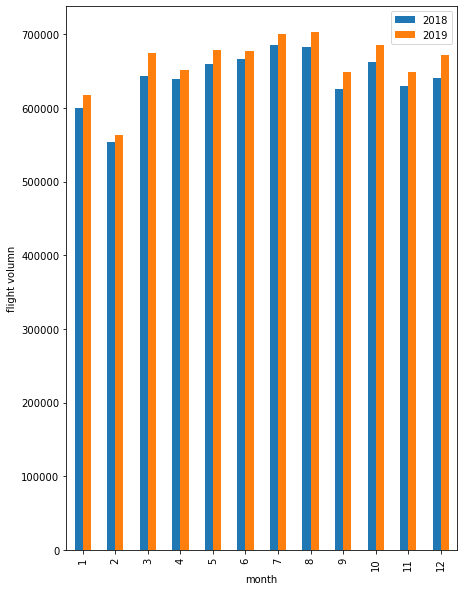

In [23]:
fig, ax = plt.subplots(figsize=(7, 10))
df_n.plot(kind='bar', ax=ax)
plt.xlabel('month')
plt.ylabel('flight volumn')
ax.legend([2018, 2019], loc= 'upper right')
plt.show()

### Domestic and international flighs

In [24]:
# the number of doesmestic and internation flights
total_fly = len(df)
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]
domestic = df.dest_city_name.apply(lambda x:x.split(",")[1].strip()).isin(states).sum()
print("Domestic flights in USA: " ,domestic)
print("International flights in USA:", total_fly - domestic)

Domestic flights in USA:  15535986
International flights in USA: 69090


### Check the cancel rate and diverted rate

In [25]:
total_operate = df['cancelled'].value_counts()[0]
print('The airplane non-cancellded rate: ', round((total_operate/total_fly)*100, 2),'%')

The airplane non-cancellded rate:  100.0 %


In [26]:
total_no_diverted = df['diverted'].value_counts()[0]
print('The airplane non-diverted rate: ', round((total_no_diverted/total_fly)*100,2),'%')

The airplane non-diverted rate:  100.0 %


### Flights with different market carries

Text(0.5, 1.0, 'Market carriers in USA between 2018 and 2019')

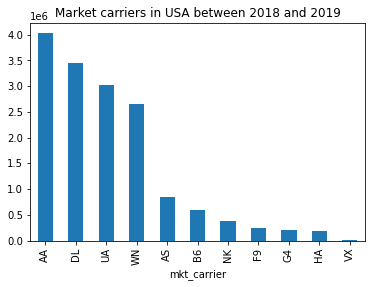

In [27]:
df.groupby(['mkt_carrier']).apply(lambda x : x['flights'].count()).sort_values(ascending=False).plot.bar()
plt.title('Market carriers in USA between 2018 and 2019')
plt.show()

### Top 10 the busiest airports in the USA

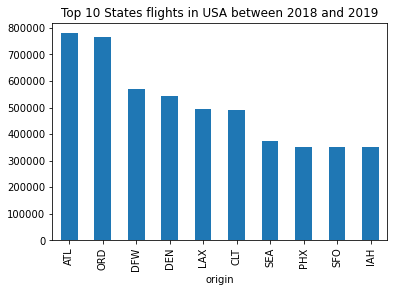

In [29]:
state_flies = df.groupby(['origin']).apply(lambda x : x['flights'].count()).sort_values(ascending=False)
state_flies[:10].plot.bar()
plt.title('Top 10 States flights in USA between 2018 and 2019')
plt.show()

### Categories flights groups based on their total volumn

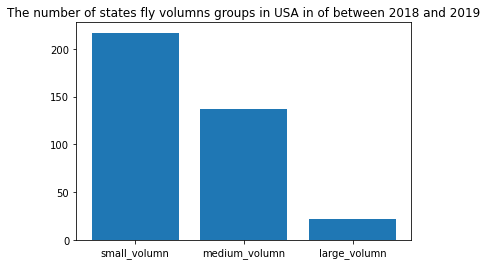

In [31]:
# check the number of airport in terms of flying amount
# small < 10000
s = len(state_flies[state_flies < 10000])

#  10000 < medium < 200000
m = len(state_flies[(state_flies<200000) & (state_flies> 10000)])
        
# larger > 200000
l = len(state_flies[state_flies>200000])
x = ['small_volumn', 'medium_volumn','large_volumn']
y = [s, m ,l]

        
#bar plot
plt.bar(x, y)
plt.title('The number of states fly volumns groups in USA in of between 2018 and 2019')
plt.show()

### Categories flights groups based on their airtime

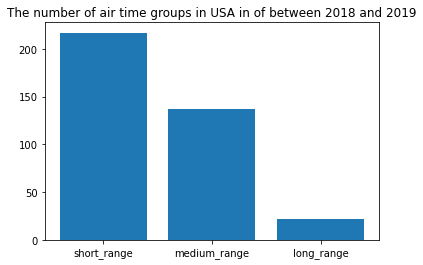

In [32]:
#air time ,short-range, medium-range, long-range

#short < = 3hr
sr = len(df[df.air_time <= 180])

# 3h<= medium <7h
mr = len(df[(df.air_time > 180) & (df.air_time <= 420)])

# long range > 7hr
lr = len(df[df.air_time > 420])

x_r = ['short_range', 'medium_range','long_range']
y_r = [s, m ,l]

        
#bar plot
plt.bar(x_r, y_r)
plt.title('The number of air time groups in USA in of between 2018 and 2019')
plt.show()

### Some statistical values

In [33]:
# the average of air time and distance for each group
#short
st = df[df.air_time <= 180].air_time.mean()
sd = df[df.air_time <= 180].distance.mean()
print('Average short range air time: ',st,'minutes')
print('Average short range distance:', sd,'miles')
print()

#meidium
mt = df[(df.air_time > 180) & (df.air_time <= 420)].air_time.mean()
md = df[(df.air_time > 180) & (df.air_time <= 420)].distance.mean()
print('Average medium range air time: ',mt,'minutes')
print('Average medium range distance:', md,'miles')
print()

#long
lt = df[df.air_time > 420].air_time.mean()
ld = df[df.air_time > 420].distance.mean()
print('Average long range air time: ',lt,'minutes')
print('Average long range distance:', ld,'miles')

Average short range air time:  86.0941673728779 minutes
Average short range distance: 587.455881550519 miles

Average medium range air time:  248.30586690055682 minutes
Average medium range distance: 1946.1019887281352 miles

Average long range air time:  497.67987784637853 minutes
Average long range distance: 4207.968664940583 miles


In [34]:
# average taxi-in and taxiout based on air time group
#short
sti = df[df.air_time <= 180].taxi_in.mean()
sto = df[df.air_time <= 180].taxi_out.mean()
print('Average short range taxi_in: ',sti,'minutes')
print('Average short range taxi_out:', sto,'minutes')
print()

#meidium
mti = df[(df.air_time > 180) & (df.air_time <= 420)].taxi_in.mean()
mto = df[(df.air_time > 180) & (df.air_time <= 420)].taxi_out.mean()
print('Average medium range air taxi_in: ',mti,'minutes')
print('Average medium range taxi_out:', mto,'minutes')
print()

#long
lti = df[df.air_time > 420].taxi_in.mean()
lto = df[df.air_time > 420].taxi_out.mean()
print('Average long range taxi_in: ',lti,'minutes')
print('Average long range taxi_out:', lto,'minutes')

Average short range taxi_in:  7.546701548646951 minutes
Average short range taxi_out: 17.354846492029044 minutes

Average medium range air taxi_in:  8.556661292423868 minutes
Average medium range taxi_out: 18.59184894131937 minutes

Average long range taxi_in:  7.762663480050454 minutes
Average long range taxi_out: 21.493328022306315 minutes


### Check time data information

In [35]:
#numerical features interested
in_features = ['crs_dep_time','crs_arr_time','taxi_in','taxi_out','wheels_off',
               'wheels_on','crs_elapsed_time','actual_elapsed_time',
                'arr_time','dep_time','dep_delay','arr_delay','air_time','distance']

In [36]:
df_time = df[in_features]

In [37]:
df_time.describe()

,crs_dep_time,crs_arr_time,taxi_in,taxi_out,wheels_off,wheels_on,crs_elapsed_time,actual_elapsed_time,arr_time,dep_time,dep_delay,arr_delay,air_time,distance
count,1.560508e+07,1.560508e+07,1.560508e+07,1.560508e+07,1.560508e+07,1.560508e+07,1.560508e+07,1.560508e+07,1.560508e+07,1.560508e+07,1.560508e+07,1.560508e+07,1.560508e+07,1.560508e+07
mean,1.328564e+03,1.483547e+03,7.680543e+00,1.752252e+01,1.358604e+03,1.459564e+03,1.381602e+02,1.331576e+02,1.464133e+03,1.334177e+03,1.047697e+01,5.477127e+00,1.079545e+02,7.707200e+02
std,4.896758e+02,5.166144e+02,6.127031e+00,1.003471e+01,5.050892e+02,5.323732e+02,7.180318e+01,7.161046e+01,5.366509e+02,5.036533e+02,4.763337e+01,4.988105e+01,6.968408e+01,5.872195e+02
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-1.430000e+02,-1.228000e+03,1.000000e+00,1.000000e+00,-1.280000e+03,-1.290000e+03,-1.384000e+03,3.100000e+01
25%,9.150000e+02,1.100000e+03,4.000000e+00,1.100000e+01,9.330000e+02,1.044000e+03,8.700000e+01,8.200000e+01,1.048000e+03,9.170000e+02,-6.000000e+00,-1.500000e+01,5.800000e+01,3.420000e+02
50%,1.320000e+03,1.510000e+03,6.000000e+00,1.500000e+01,1.341000e+03,1.459000e+03,1.190000e+02,1.150000e+02,1.503000e+03,1.327000e+03,-2.000000e+00,-6.000000e+00,8.900000e+01,6.050000e+02
75%,1.735000e+03,1.916000e+03,9.000000e+00,2.000000e+01,1.759000e+03,1.909000e+03,1.680000e+02,1.630000e+02,1.914000e+03,1.744000e+03,7.000000e+00,8.000000e+00,1.370000e+02,1.005000e+03
max,2.359000e+03,2.400000e+03,3.160000e+02,1.425000e+03,2.400000e+03,2.400000e+03,1.645000e+03,1.604000e+03,2.400000e+03,2.400000e+03,2.976000e+03,2.973000e+03,1.557000e+03,5.095000e+03


In [38]:
df_time.dtypes

crs_dep_time           Int64
crs_arr_time           Int64
taxi_in                Int64
taxi_out               Int64
wheels_off             Int64
wheels_on              Int64
crs_elapsed_time       Int64
actual_elapsed_time    Int64
arr_time               Int64
dep_time               Int64
dep_delay              Int64
arr_delay              Int64
air_time               Int64
distance               Int64
dtype: object

In [39]:
# update to correct datatype to datetime
time_features = ['crs_dep_time','crs_arr_time','wheels_off','wheels_on','arr_time','dep_time']

# convert into string
df_time[time_features] = df_time[time_features].astype(str)

# fill the string into 4 digits only
df_time[time_features] = df_time[time_features].apply(lambda x:x.str.zfill(4))

# Replace every 2400 with 0000
df_time.replace('2400', '0000', inplace=True)

C:\Users\Max\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\Users\Max\anaconda3\lib\site-packages\pandas\core\frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [40]:
#check the minutes >= 60
df_time[time_features].where(df_time[time_features].apply(lambda x:x.str[2:])  >='60').sum()

crs_dep_time    0.0
crs_arr_time    0.0
wheels_off      0.0
wheels_on       0.0
arr_time        0.0
dep_time        0.0
dtype: float64

In [41]:
# #convert into datetime
for i in time_features:
   df_time[i] = pd.to_datetime(df_time[i], format='%H%M').dt.time

<ipython-input-41-ea0849c7b19a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_time[i] = pd.to_datetime(df_time[i], format='%H%M').dt.time


In [42]:
df_time.head(10)

,crs_dep_time,crs_arr_time,taxi_in,taxi_out,wheels_off,wheels_on,crs_elapsed_time,actual_elapsed_time,arr_time,dep_time,dep_delay,arr_delay,air_time,distance
0,06:15:00,07:38:00,9,26,06:37:00,07:12:00,83,70,07:21:00,06:11:00,-4,-17,35,207
1,08:15:00,11:21:00,11,38,09:40:00,12:08:00,126,137,12:19:00,09:02:00,47,58,88,651
2,15:05:00,16:50:00,7,21,16:08:00,17:06:00,105,86,17:13:00,15:47:00,42,23,58,386
3,14:55:00,17:29:00,4,17,15:06:00,17:06:00,154,141,17:10:00,14:49:00,-6,-19,120,945
4,18:10:00,20:46:00,4,13,18:15:00,20:19:00,156,141,20:23:00,18:02:00,-8,-23,124,945
5,07:00:00,10:03:00,13,51,07:48:00,10:18:00,123,154,10:31:00,06:57:00,-3,28,90,616
6,10:38:00,11:40:00,6,18,11:18:00,11:54:00,122,120,12:00:00,11:00:00,22,20,96,616
7,13:20:00,14:50:00,7,24,14:57:00,15:50:00,90,84,15:57:00,14:33:00,73,67,53,187
8,11:25:00,12:58:00,6,27,11:48:00,12:44:00,93,89,12:50:00,11:21:00,-4,-8,56,378
9,15:00:00,16:35:00,7,26,15:35:00,16:23:00,95,81,16:30:00,15:09:00,9,-5,48,187


### By observation:
#### arr_time - crs_arr_time = arr_delay
#### dep_time - crs_dep_time = dep_delay
#### (wheels_off - dep_time) + (wheels_on - arr_time) + air_time = actual_elapsed_time

In [43]:
# update the entire dataset after change datetime type
df.update(df_time)

In [44]:
df.head(2)

,index,fl_date,mkt_carrier,mkt_carrier_fl_num,origin_airport_id,origin,dest_airport_id,dest,dest_city_name,crs_dep_time,...,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance
0,0,2018-01-01,DL,3468,15380,TVC,11433,DTW,"Detroit, MI",06:15:00,...,07:38:00,07:21:00,-17,0,0,83,70,35,1,207
1,1,2018-01-01,DL,3470,13871,OMA,11433,DTW,"Detroit, MI",08:15:00,...,11:21:00,12:19:00,58,0,0,126,137,88,1,651


In [46]:
# continue to drop extra features
extra_featues = ['index','cancelled','diverted','dest_city_name']
df = df.drop(columns=extra_featues)

#reset index
df = df.reset_index()
df = df.drop(columns=['index'])

In [47]:
#df.to_csv('flights_v2.csv')

In [48]:
# join origin and dest as origin - dest
df['origin'] = df['origin']+'-'+df['dest']

#drop dest column
df.drop(columns=['dest'],inplace=True)

#rename origin as route
df = df.rename(columns={'origin':'route'})

In [49]:
df.head(2)

,fl_date,mkt_carrier,mkt_carrier_fl_num,origin_airport_id,route,dest_airport_id,crs_dep_time,dep_time,dep_delay,taxi_out,...,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance
0,2018-01-01,DL,3468,15380,TVC-DTW,11433,06:15:00,06:11:00,-4,26,...,07:12:00,9,07:38:00,07:21:00,-17,83,70,35,1,207
1,2018-01-01,DL,3470,13871,OMA-DTW,11433,08:15:00,09:02:00,47,38,...,12:08:00,11,11:21:00,12:19:00,58,126,137,88,1,651


In [50]:
(df.flights >1).sum()

0

In [51]:
# drop flight features
df = df.drop(columns=['flights'])

In [52]:
#df.to_csv('flights_v3.csv')

### Feature Engineering parts, condense dataset

In [53]:
def calcualte_time_difference(df1, df2, fl_date):
    """
    this function take two dataframe and doing time difference calculation
    it will return the number of minute as a dataframe
    
    arges: df1 would be arrival time
           df2 would be depart time
    """
    s = len(df1)
    # the dataframe for return:
    df = pd.DataFrame()
    ls = []
    for i in range(s):
        start_time = df1.iloc[i]
        stop_time = df2.iloc[i]
        date = fl_date.iloc[i]
        datetime1 = datetime.datetime.combine(date, start_time) 
        datetime2 = datetime.datetime.combine(date, stop_time) 
        time_diff = datetime2 - datetime1
        m = time_diff.seconds//60
        ls.append(m)
    return pd.DataFrame(ls)

In [54]:
# crs_arr_time - crs_dep_time
a = calcualte_time_difference(df.crs_dep_time, df.crs_arr_time, df.fl_date)
a.columns =['crs_route']

In [55]:
# crs_elapsed_time - crs_route 
b = (a.crs_route- df_time.crs_elapsed_time).to_frame()
b.columns = ['time_diff_crs_elapsed_route_time']

In [56]:
# speed
s = (df_time.distance/df_time.air_time).to_frame()
s.columns=['speed']

In [60]:
selected_features = ['fl_date','mkt_carrier','mkt_carrier_fl_num','origin_airport_id','dest_airport_id','route','crs_dep_time','crs_arr_time','crs_elapsed_time','distance','arr_delay']


In [61]:
df_final = pd.concat([df[selected_features], a,b,s], axis=1)

In [63]:
#df_final.to_csv('flights_v4.csv')

In [64]:
df_final.shape

(15605076, 14)

In [67]:
df_final = df_final.drop(df_final[df_final.crs_route < 30].index)

In [70]:
#df_final.to_csv('flights_v5.csv')

In [71]:
df_final.head(2)

,fl_date,mkt_carrier,mkt_carrier_fl_num,origin_airport_id,dest_airport_id,route,crs_dep_time,crs_arr_time,crs_elapsed_time,distance,arr_delay,crs_route,time_diff_crs_elapsed_route_time,speed
0,2018-01-01,DL,3468,15380,11433,TVC-DTW,06:15:00,07:38:00,83,207,-17,83,0,5.914286
1,2018-01-01,DL,3470,13871,11433,OMA-DTW,08:15:00,11:21:00,126,651,58,186,60,7.397727
